## Classifier mode comparison

In [58]:
from pandas import read_csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [59]:
pd.set_option('display.max_columns', None)

In [60]:
#load dataset

df = read_csv('../cleaned_dataset.csv')
df.shape

(784754, 41)

In [61]:
df.head()

,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,Carrier,Origin,OriginState,OriginWac,Dest,DestState,DestWac,CRSDepTime,DepTimeBlk,CRSArrTime,ArrTimeBlk,CRSElapsedTime,Distance,DistanceGroup,AptPreviousDateDelay,AptNoOfFlight,tmpf,dwpf,relh,drct,sknt,p01i,alti,vsby,gust,skyc1,skyc2,skyc3,skyc4,skyl1,skyl2,skyl3,skyl4,presentwx,IsDelay
0,8381,2017,2,4,2,7,OO,ORD,IL,41,MBS,MI,43,13,1300-1359,15,1500-1559,72.0,222.0,1,85.0,715.0,57.9,34.0,40.43,140.0,10.0,0.0,30.06,10.0,0.0,BKN,BKN,OVC,M,8500.0,16000.0,25000.0,-1.0,M,0
1,8382,2017,2,4,2,7,AA,PHX,AZ,81,SEA,WA,93,22,2200-2259,1,0001-0559,188.0,1107.0,5,56.0,478.0,73.9,32.0,21.40,250.0,4.0,0.0,29.83,10.0,0.0,CLR,M,M,M,-1.0,-1.0,-1.0,-1.0,M,0
2,8383,2017,2,4,2,7,WN,MSP,MN,63,BWI,MD,35,6,0600-0659,10,1000-1059,140.0,936.0,4,22.0,378.0,45.0,34.0,65.13,180.0,5.0,0.0,30.05,10.0,0.0,BKN,M,M,M,10000.0,-1.0,-1.0,-1.0,M,0
3,8384,2017,2,4,2,7,OO,DEN,CO,82,FCA,MT,84,11,1100-1159,13,1300-1359,138.0,752.0,4,91.0,603.0,57.0,28.0,32.75,-1.0,4.0,0.0,29.87,10.0,0.0,FEW,FEW,M,M,7000.0,22000.0,-1.0,-1.0,M,0
4,8385,2017,2,4,2,7,OO,ATL,GA,34,ORD,IL,41,18,1800-1859,19,1900-1959,127.0,606.0,3,70.0,1051.0,81.0,45.0,28.15,140.0,6.0,0.0,29.97,10.0,0.0,BKN,BKN,M,M,20000.0,25000.0,-1.0,-1.0,M,0


In [62]:
df = df.drop('Unnamed: 0', axis=1)
df.reset_index(drop=True)

,Year,Quarter,Month,DayofMonth,DayOfWeek,Carrier,Origin,OriginState,OriginWac,Dest,DestState,DestWac,CRSDepTime,DepTimeBlk,CRSArrTime,ArrTimeBlk,CRSElapsedTime,Distance,DistanceGroup,AptPreviousDateDelay,AptNoOfFlight,tmpf,dwpf,relh,drct,sknt,p01i,alti,vsby,gust,skyc1,skyc2,skyc3,skyc4,skyl1,skyl2,skyl3,skyl4,presentwx,IsDelay
0,2017,2,4,2,7,OO,ORD,IL,41,MBS,MI,43,13,1300-1359,15,1500-1559,72.0,222.0,1,85.0,715.0,57.9,34.0,40.43,140.0,10.0,0.00,30.06,10.0,0.0,BKN,BKN,OVC,M,8500.0,16000.0,25000.0,-1.0,M,0
1,2017,2,4,2,7,AA,PHX,AZ,81,SEA,WA,93,22,2200-2259,1,0001-0559,188.0,1107.0,5,56.0,478.0,73.9,32.0,21.40,250.0,4.0,0.00,29.83,10.0,0.0,CLR,M,M,M,-1.0,-1.0,-1.0,-1.0,M,0
2,2017,2,4,2,7,WN,MSP,MN,63,BWI,MD,35,6,0600-0659,10,1000-1059,140.0,936.0,4,22.0,378.0,45.0,34.0,65.13,180.0,5.0,0.00,30.05,10.0,0.0,BKN,M,M,M,10000.0,-1.0,-1.0,-1.0,M,0
3,2017,2,4,2,7,OO,DEN,CO,82,FCA,MT,84,11,1100-1159,13,1300-1359,138.0,752.0,4,91.0,603.0,57.0,28.0,32.75,-1.0,4.0,0.00,29.87,10.0,0.0,FEW,FEW,M,M,7000.0,22000.0,-1.0,-1.0,M,0
4,2017,2,4,2,7,OO,ATL,GA,34,ORD,IL,41,18,1800-1859,19,1900-1959,127.0,606.0,3,70.0,1051.0,81.0,45.0,28.15,140.0,6.0,0.00,29.97,10.0,0.0,BKN,BKN,M,M,20000.0,25000.0,-1.0,-1.0,M,0
5,2017,2,4,2,7,OO,LAX,CA,91,SAN,CA,91,9,0900-0959,10,1000-1059,64.0,109.0,1,96.0,591.0,66.0,54.0,65.21,-1.0,4.0,0.00,30.02,9.0,0.0,FEW,FEW,SCT,M,1000.0,23000.0,28000.0,-1.0,M,0
6,2017,2,4,2,7,WN,MCO,FL,33,SJU,PR,3,11,1100-1159,13,1300-1359,160.0,1189.0,5,70.0,411.0,86.0,66.2,51.72,100.0,9.0,0.00,30.08,10.0,0.0,SCT,SCT,BKN,M,5000.0,15000.0,25000.0,-1.0,M,0
7,2017,2,4,2,7,WN,MSP,MN,63,DEN,CO,82,17,1700-1759,18,1800-1859,125.0,680.0,3,22.0,378.0,54.0,44.1,69.09,180.0,8.0,0.00,29.81,10.0,18.0,OVC,M,M,M,2200.0,-1.0,-1.0,-1.0,M,0
8,2017,2,4,2,7,OO,LAX,CA,91,SBP,CA,91,14,1400-1459,15,1500-1559,57.0,155.0,1,96.0,591.0,63.0,55.9,77.61,260.0,11.0,0.00,29.97,9.0,0.0,FEW,FEW,M,M,300.0,20000.0,-1.0,-1.0,M,0
9,2017,2,4,2,7,OO,DEN,CO,82,RKS,WY,88,18,1800-1859,19,1900-1959,66.0,260.0,2,91.0,603.0,55.0,33.1,43.31,50.0,7.0,0.00,29.75,10.0,0.0,BKN,BKN,BKN,M,9000.0,14000.0,22000.0,-1.0,M,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784754 entries, 0 to 784753
Data columns (total 40 columns):
Year                    784754 non-null int64
Quarter                 784754 non-null int64
Month                   784754 non-null int64
DayofMonth              784754 non-null int64
DayOfWeek               784754 non-null int64
Carrier                 784754 non-null object
Origin                  784754 non-null object
OriginState             784754 non-null object
OriginWac               784754 non-null int64
Dest                    784754 non-null object
DestState               784754 non-null object
DestWac                 784754 non-null int64
CRSDepTime              784754 non-null int64
DepTimeBlk              784754 non-null object
CRSArrTime              784754 non-null int64
ArrTimeBlk              784754 non-null object
CRSElapsedTime          784754 non-null float64
Distance                784754 non-null float64
DistanceGroup           784754 non-null int64
AptP

In [64]:
numeric_list = ['Year','Quarter','Month','DayofMonth','DayOfWeek','OriginWac','DestWac','CRSDepTime','CRSArrTime','CRSElapsedTime','Distance','DistanceGroup','AptPreviousDateDelay','AptNoOfFlight','tmpf',' dwpf',' relh',' drct',' sknt',' p01i',' alti',' gust',' skyl1',' skyl2',' skyl3',' skyl4','IsDelay']
cat_list = ['Carrier','Origin','OriginState','Dest','DestState','DepTimeBlk','ArrTimeBlk',' skyc1',' skyc2',' skyc3',' skyc4',' presentwx']

### Converting string to numeric in all categorical columns

In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
tmp = df[cat_list].apply(le.fit_transform)

In [66]:
df.drop(cat_list, axis=1, inplace=True)
df = pd.concat([df, tmp], axis=1)

In [67]:
#Move IsDelay column which will be the target column to the back

cols = list(df.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('IsDelay')) #Remove IsDelay from list
df = df[cols+['IsDelay']]

df[' skyl1'] = df[' skyl1'].astype(np.int64)
df[' skyl2'] = df[' skyl2'].astype(np.int64)
df[' skyl3'] = df[' skyl3'].astype(np.int64)
df[' skyl4'] = df[' skyl4'].astype(np.int64)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784754 entries, 0 to 784753
Data columns (total 40 columns):
Year                    784754 non-null int64
Quarter                 784754 non-null int64
Month                   784754 non-null int64
DayofMonth              784754 non-null int64
DayOfWeek               784754 non-null int64
OriginWac               784754 non-null int64
DestWac                 784754 non-null int64
CRSDepTime              784754 non-null int64
CRSArrTime              784754 non-null int64
CRSElapsedTime          784754 non-null float64
Distance                784754 non-null float64
DistanceGroup           784754 non-null int64
AptPreviousDateDelay    784754 non-null float64
AptNoOfFlight           784754 non-null float64
tmpf                    784754 non-null float64
 dwpf                   784754 non-null float64
 relh                   784754 non-null float64
 drct                   784754 non-null float64
 sknt                   784754 non-null float

In [68]:
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,OriginWac,DestWac,CRSDepTime,CRSArrTime,CRSElapsedTime,Distance,DistanceGroup,AptPreviousDateDelay,AptNoOfFlight,tmpf,dwpf,relh,drct,sknt,p01i,alti,vsby,gust,skyl1,skyl2,skyl3,skyl4,Carrier,Origin,OriginState,Dest,DestState,DepTimeBlk,ArrTimeBlk,skyc1,skyc2,skyc3,skyc4,presentwx,IsDelay
0,2017,2,4,2,7,41,43,13,15,72.0,222.0,1,85.0,715.0,57.9,34.0,40.43,140.0,10.0,0.0,30.06,10.0,0.0,8500,16000,25000,-1,8,15,5,172,20,8,10,0,0,3,2,39,0
1,2017,2,4,2,7,81,93,22,1,188.0,1107.0,5,56.0,478.0,73.9,32.0,21.40,250.0,4.0,0.0,29.83,10.0,0.0,-1,-1,-1,-1,0,16,0,253,47,17,0,1,2,2,2,39,0
2,2017,2,4,2,7,63,35,6,10,140.0,936.0,4,22.0,378.0,45.0,34.0,65.13,180.0,5.0,0.0,30.05,10.0,0.0,10000,-1,-1,-1,11,14,9,44,18,1,5,0,2,2,2,39,0
3,2017,2,4,2,7,82,84,11,13,138.0,752.0,4,91.0,603.0,57.0,28.0,32.75,-1.0,4.0,0.0,29.87,10.0,0.0,7000,22000,-1,-1,8,4,2,96,24,6,8,2,1,2,2,39,0
4,2017,2,4,2,7,34,41,18,19,127.0,606.0,3,70.0,1051.0,81.0,45.0,28.15,140.0,6.0,0.0,29.97,10.0,0.0,20000,25000,-1,-1,8,0,4,208,12,13,14,0,0,2,2,39,0


In [69]:
#Delay flight percentage

print('Percent of delayed flight in dataset: ',df['IsDelay'].sum()/len(df))

Percent of delayed flight in dataset:  0.22313489322768665


## Splitting Training Set and Test Set


In [70]:
#Split Train and Test dataset

from sklearn.model_selection import train_test_split

X, y = df[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'OriginWac',
       'DestWac', 'CRSDepTime', 'CRSArrTime', 'CRSElapsedTime', 'Distance',
       'DistanceGroup', 'AptPreviousDateDelay', 'AptNoOfFlight', 'tmpf',
       ' dwpf', ' relh', ' drct', ' sknt', ' p01i', ' alti', ' vsby', ' gust',
       ' skyl1', ' skyl2', ' skyl3', ' skyl4', 'Carrier', 'Origin',
       'OriginState', 'Dest', 'DestState', 'DepTimeBlk', 'ArrTimeBlk',
       ' skyc1', ' skyc2', ' skyc3', ' skyc4', ' presentwx']], df['IsDelay']

In [71]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.9, random_state=50)
for keep_index, leave_index in sss.split(X, y):
    X_keep, X_leave = X.iloc[keep_index], X.iloc[leave_index]
    y_keep, y_leave = y.iloc[keep_index], y.iloc[leave_index]

In [72]:
sss1 = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=60)
for train_index, test_index in sss1.split(X_keep, y_keep):
    X_train, X_test = X_keep.iloc[train_index], X_keep.iloc[test_index]
    y_train, y_test = y_keep.iloc[train_index], y_keep.iloc[test_index]

In [73]:
X_train.shape

(54932, 39)

In [74]:
X_test.shape

(23543, 39)

### Model Comparison

Comparing different models by ROC Curve and Precision Recall Curve

In [75]:
# Import necessary modules
from sklearn.metrics import roc_auc_score, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

/Users/cuthlo/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/cuthlo/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


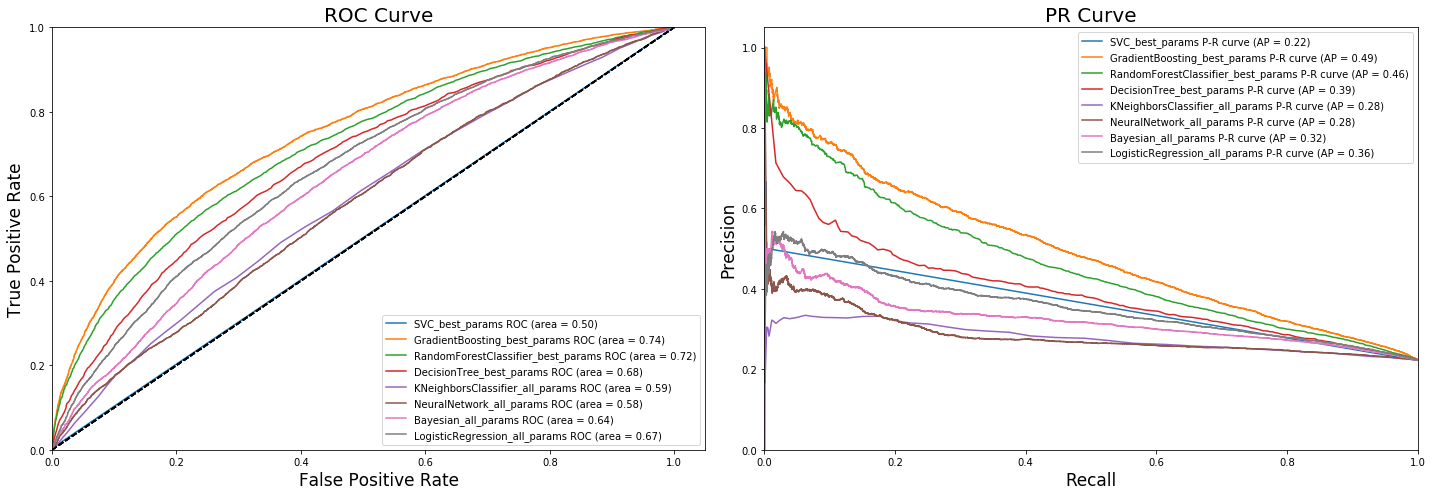

CPU times: user 2h 15min 1s, sys: 36.8 s, total: 2h 15min 38s
Wall time: 2h 25min 51s


In [76]:
%%time 

#initialize the classifier with the best hyperparameters found before
model_forest = RandomForestClassifier(n_estimators=1000)
model_mlp = MLPClassifier(hidden_layer_sizes=400)
model_knn = KNeighborsClassifier(n_neighbors=131)
model_tree = DecisionTreeClassifier(min_samples_leaf=250)
model_gbrt = GradientBoostingClassifier(n_estimators=2000 , max_depth=6 , learning_rate=0.01 )
model_svc = SVC(C=1 , gamma=1, probability=True)
model_gnb = GaussianNB()
model_logreg = LogisticRegression(C=19306.977288832535)


# ROC

models = [
    {
        'label' : 'SVC_best_params',
        'model': model_svc,
        'roc_train': X_train,
        'roc_test': X_test,
        'roc_train_class': y_train,        
        'roc_test_class': y_test,        
    }, 
    {
        'label' : 'GradientBoosting_best_params',
        'model': model_gbrt,
        'roc_train': X_train,
        'roc_test': X_test,
        'roc_train_class': y_train,        
        'roc_test_class': y_test,                
    },
    {
        'label' : 'RandomForestClassifier_best_params',
        'model': model_forest,
        'roc_train': X_train,
        'roc_test': X_test,
        'roc_train_class': y_train,        
        'roc_test_class': y_test,        
    },
    {
        'label' : 'DecisionTree_best_params',
        'model': model_tree,
        'roc_train': X_train,
        'roc_test': X_test,
        'roc_train_class': y_train,        
        'roc_test_class': y_test,        
    },          
    {
        'label' : 'KNeighborsClassifier_all_params',
        'model': model_knn,
        'roc_train': X_train,
        'roc_test': X_test,
        'roc_train_class': y_train,        
        'roc_test_class': y_test,        
    },
    {
        'label' : 'NeuralNetwork_all_params',
        'model': model_mlp,
        'roc_train': X_train,
        'roc_test': X_test,
        'roc_train_class': y_train,        
        'roc_test_class': y_test,        
    },    
    {
        'label' : 'Bayesian_all_params',
        'model': model_gnb,
        'roc_train': X_train,
        'roc_test': X_test,
        'roc_train_class': y_train,        
        'roc_test_class': y_test,        
    },
    {
        'label' : 'LogisticRegression_all_params',
        'model': model_logreg,
        'roc_train': X_train,
        'roc_test': X_test,
        'roc_train_class': y_train,        
        'roc_test_class': y_test,        
    }
]


#plt.clf()
plt.figure(figsize=(20,7))

for m in models:
    m['model'].probability = True
    probas = m['model'].fit(m['roc_train'], m['roc_train_class']).predict_proba(m['roc_test'])
    fpr, tpr, thresholds = roc_curve(m['roc_test_class'], probas[:, 1])
    average_precision = average_precision_score(m['roc_test_class'], probas[:, 1])
    precision, recall, _ = precision_recall_curve(m['roc_test_class'], probas[:, 1])
    roc_auc  = auc(fpr, tpr)
    
    ax1 = plt.subplot(121)
    lw=2
    ax1.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], roc_auc))
    plt.title('ROC Curve', fontsize=20)
    plt.xlabel('False Positive Rate', fontsize=17)
    plt.ylabel('True Positive Rate', fontsize=17)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.0])
    plt.legend(loc=0, fontsize='medium')
    
    ax2 = plt.subplot(122)
    ax2.plot(recall, precision, label='%s P-R curve (AP = %0.2f)' % (m['label'], average_precision) )
    plt.title('PR Curve', fontsize=20)
    plt.xlabel('Recall', fontsize=17)
    plt.ylabel('Precision', fontsize=17)
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.legend(loc=0, fontsize='medium')

plt.tight_layout()
plt.show()

In [78]:
plt.savefig("ROC.pdf")